In [28]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import mean
from numpy import cov
from numpy.linalg import eig
import warnings
warnings.filterwarnings('ignore')

In [29]:
X_trn = np.loadtxt('data/usps.train', delimiter=',', usecols=(np.arange(1,257)))
y_trn = np.loadtxt('data/usps.train', delimiter=',', usecols=(0))

X_val = np.loadtxt('data/usps.valid', delimiter=',', usecols=(np.arange(1,257)))
y_val = np.loadtxt('data/usps.valid', delimiter=',', usecols=(0))

X_tst = np.loadtxt('data/usps.test', delimiter=',', usecols=(np.arange(1,257)))
y_tst = np.loadtxt('data/usps.test', delimiter=',', usecols=(0))

print(X_trn.shape)
print(X_val.shape)
print(X_tst.shape)
print(y_trn.shape)
print(y_val.shape)
print(y_tst.shape)

(1000, 256)
(300, 256)
(300, 256)
(1000,)
(300,)
(300,)


In [30]:
# Calculate the mean of each feature column
M_trn = mean(X_trn.T, axis=1)
M_val = mean(X_val.T, axis=1)
M_tst = mean(X_tst.T, axis=1)

In [31]:
# Centre each feature column
C_trn = X_trn - M_trn
C_val = X_val - M_val
C_tst = X_tst - M_tst

print(C_trn.shape)
print(C_val.shape)
print(C_tst.shape)

(1000, 256)
(300, 256)
(300, 256)


In [32]:
# Find the feature covariance matrix
V_trn = cov(C_trn.T)
V_val = cov(C_val.T)
V_tst = cov(C_tst.T)

print(V_trn.shape)
print(V_val.shape)
print(V_tst.shape)

(256, 256)
(256, 256)
(256, 256)


In [33]:
# Perform eigen-decomposition of the covariance matrix
eigen_vals_trn, eigen_vecs_trn = eig(V_trn)
eigen_vals_val, eigen_vecs_val = eig(V_val)
eigen_vals_tst, eigen_vecs_tst = eig(V_tst)

print(eigen_vals_trn.shape)
print(eigen_vecs_trn.shape)
print(eigen_vals_val.shape)
print(eigen_vecs_val.shape)
print(eigen_vals_tst.shape)
print(eigen_vecs_tst.shape)

(256,)
(256, 256)
(256,)
(256, 256)
(256,)
(256, 256)


In [34]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs_trn = [(np.abs(eigen_vals_trn[i]), eigen_vecs_trn[:,i]) for i in range(len(eigen_vals_trn))]
eigen_pairs_val = [(np.abs(eigen_vals_val[i]), eigen_vecs_val[:,i]) for i in range(len(eigen_vals_val))]
eigen_pairs_tst = [(np.abs(eigen_vals_tst[i]), eigen_vecs_tst[:,i]) for i in range(len(eigen_vals_tst))]

# Sort the (value, vector) tuples from high to low value
eigen_pairs_trn.sort(key=lambda x: x[0], reverse=True)
eigen_pairs_val.sort(key=lambda x: x[0], reverse=True)
eigen_pairs_tst.sort(key=lambda x: x[0], reverse=True)

In [35]:
# Find the top 16 eigendigits
vec_dict_trn = {}
i = 0
for p in eigen_pairs_trn[:16]:
    vec_dict_trn[i] = p[1]
    i = i+1
digits_trn = vec_dict_trn.values()

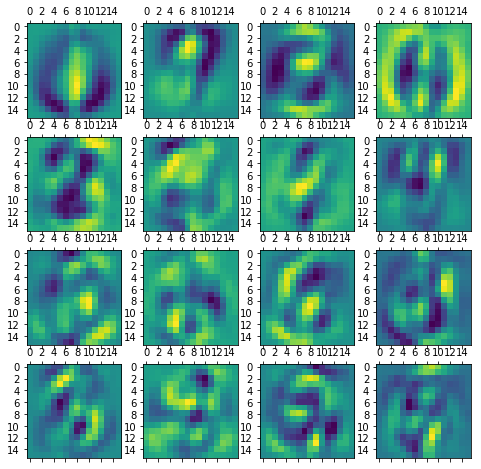

In [36]:
# Visualize the top 16 eigendigits
fig = plt.figure(figsize=(8,8))
i=1
for d in digits_trn:
    ax = fig.add_subplot(4,4,i)
    ax.matshow(d.reshape((16,16)).astype(float))
    i=i+1
plt.show()

In [37]:
# Find cumulative explained variance in training set
total = np.sum(eigen_vals_trn)
cum_exp_var_dict = {}
i = 1
sum = 0
for p in eigen_pairs_trn:
    sum = sum + (p[0]*100/total)
    cum_exp_var_dict[i] = sum
    i = i+1
cv_dict = dict(zip(cum_exp_var_dict.values(),cum_exp_var_dict.keys()))

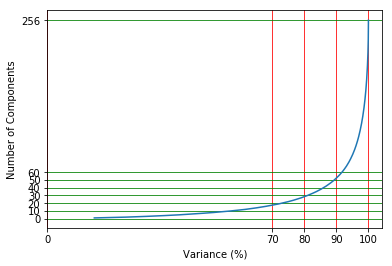

In [38]:
# Plot cumulative explained variance vs number of components plot of the traning set
plt.figure()
plt.grid(axis='x', color='r')
plt.grid(axis='y', color='g')
plt.plot(cv_dict.keys(), cv_dict.values())
plt.ylabel('Number of Components')
plt.xlabel('Variance (%)')
plt.yticks([0, 10, 20, 30, 40, 50, 60, 256])
plt.xticks([0, 70, 80, 90, 100])
plt.show()

**To achieve 70%, 80% and 90% of the total variance in the training set, the respective approximate dimensionality required are as follows:**
* k<sub>70</sub> = ~18 components
* k<sub>80</sub> = ~29 components
* k<sub>90</sub> = ~54 components

For k<sub>100</sub> all 256 components are required

**To obtain X<sub>70</sub> with 70% variance, we project 18 components**<br>
**To obtain X<sub>80</sub> with 80% variance, we project 29 components**<br>
**To obtain X<sub>90</sub> with 90% variance, we project 54 components**<br>
**To obtain X<sub>100</sub> with 100% variance, we project 256 components**

In [39]:
# Find projection matrix with top 18, 29, and 54 components
P_18_trn = np.hstack([eigen_vecs_trn[i].reshape(256,1) for i in range(0,18)])
print(P_18_trn.shape)

P_18_val = np.hstack([eigen_vecs_val[i].reshape(256,1) for i in range(0,18)])
print(P_18_val.shape)

P_18_tst = np.hstack([eigen_vecs_tst[i].reshape(256,1) for i in range(0,18)])
print(P_18_tst.shape)

P_29_trn = np.hstack([eigen_vecs_trn[i].reshape(256,1) for i in range(0,29)])
print(P_29_trn.shape)

P_29_val = np.hstack([eigen_vecs_val[i].reshape(256,1) for i in range(0,29)])
print(P_29_val.shape)

P_29_tst = np.hstack([eigen_vecs_tst[i].reshape(256,1) for i in range(0,29)])
print(P_29_tst.shape)

P_54_trn = np.hstack([eigen_vecs_trn[i].reshape(256,1) for i in range(0,54)])
print(P_54_trn.shape)

P_54_val = np.hstack([eigen_vecs_val[i].reshape(256,1) for i in range(0,54)])
print(P_54_val.shape)

P_54_tst = np.hstack([eigen_vecs_tst[i].reshape(256,1) for i in range(0,54)])
print(P_54_tst.shape)

(256, 18)
(256, 18)
(256, 18)
(256, 29)
(256, 29)
(256, 29)
(256, 54)
(256, 54)
(256, 54)


In [44]:
# Find the projection with the projection matrices
X_70_trn = C_trn.dot(P_18_trn)
print(X_70_trn.shape)

X_70_val = C_val.dot(P_18_val)
print(X_70_val.shape)

X_70_tst = C_tst.dot(P_18_tst)
print(X_70_tst.shape)

X_80_trn = C_trn.dot(P_29_trn)
print(X_80_trn.shape)

X_80_val = C_val.dot(P_29_val)
print(X_80_val.shape)

X_80_tst = C_tst.dot(P_29_tst)
print(X_80_tst.shape)

X_90_trn = C_trn.dot(P_54_trn)
print(X_90_trn.shape)

X_90_val = C_val.dot(P_54_val)
print(X_90_val.shape)

X_90_tst = C_tst.dot(P_54_tst)
print(X_90_tst.shape)

X_100_trn = C_trn
print(X_100_trn.shape)

X_100_val = C_val
print(X_100_val.shape)

X_100_tst = C_tst
print(X_100_tst.shape)

(1000, 18)
(300, 18)
(300, 18)
(1000, 29)
(300, 29)
(300, 29)
(1000, 54)
(300, 54)
(300, 54)
(1000, 256)
(300, 256)
(300, 256)


In [56]:
# Learn different multi-class SVM classifiers for different reg terms (alpha)

alpha_range = np.arange(-4.0, 0, 1.0)
alpha_values = np.power(10.0, alpha_range)

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import hinge_loss


print("{:9s}\t{:9s}\t{:9s}".format('k', 'alpha', 'Validation Error'))

for alpha in alpha_values:
    clf = SGDClassifier(alpha=alpha, loss="hinge", penalty="l2")
    
    clf_X_70 = clf.fit(X_70_trn, y_trn)
    y_val_70_pred = clf_X_70.predict(X_70_val)
    valErr_X_70 = len(y_val) * hinge_loss(y_val, y_val_70_pred) 
    
    clf_X_80 = clf.fit(X_80_trn, y_trn)
    y_val_80_pred = clf_X_80.predict(X_80_val)
    valErr_X_80 = len(y_val) * hinge_loss(y_val, y_val_80_pred) 
    
    clf_X_90 = clf.fit(X_90_trn, y_trn)
    y_val_90_pred = clf_X_90.predict(X_90_val)
    valErr_X_90 = len(y_val) * hinge_loss(y_val, y_val_90_pred) 
    
    clf_X_100 = clf.fit(X_100_trn, y_trn)
    y_val_100_pred = clf_X_100.predict(X_100_val)
    valErr_X_100 = len(y_val) * hinge_loss(y_val, y_val_100_pred) 
    
    print("{:1f}\t{:1f}\t{:1f}".format(70, alpha, valErr_X_70))
    print("{:1f}\t{:1f}\t{:1f}".format(80, alpha, valErr_X_80))
    print("{:1f}\t{:1f}\t{:1f}".format(90, alpha, valErr_X_90))
    print("{:1f}\t{:1f}\t{:1f}".format(100, alpha, valErr_X_100))
    


k        	alpha    	Validation Error


IndexError: too many indices for array